In [1]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import trading as trd

Using Theano backend.


In [3]:
# relaod module after modifying it
import importlib
importlib.reload(trd.stock_history)
importlib.reload(trd)

<module 'trading' from 'C:\\Users\\hamza\\Documents\\school\\cs_229\\cs229_final_project\\src\\trading\\__init__.py'>

In [11]:
low_beta = trd.get_lo_beta_stock_symbols()
high_beta = trd.get_hi_beta_stock_symbols()

start_date = np.datetime64('2001-07-01')
end_date = np.datetime64('2016-07-02')

In [5]:
trd.download_stock_histories(trd.LO_BETA_DIR, low_beta, start_date)

In [6]:
trd.download_stock_histories(trd.HI_BETA_DIR, high_beta, start_date)

In [10]:
betas = trd.get_stock_betas()

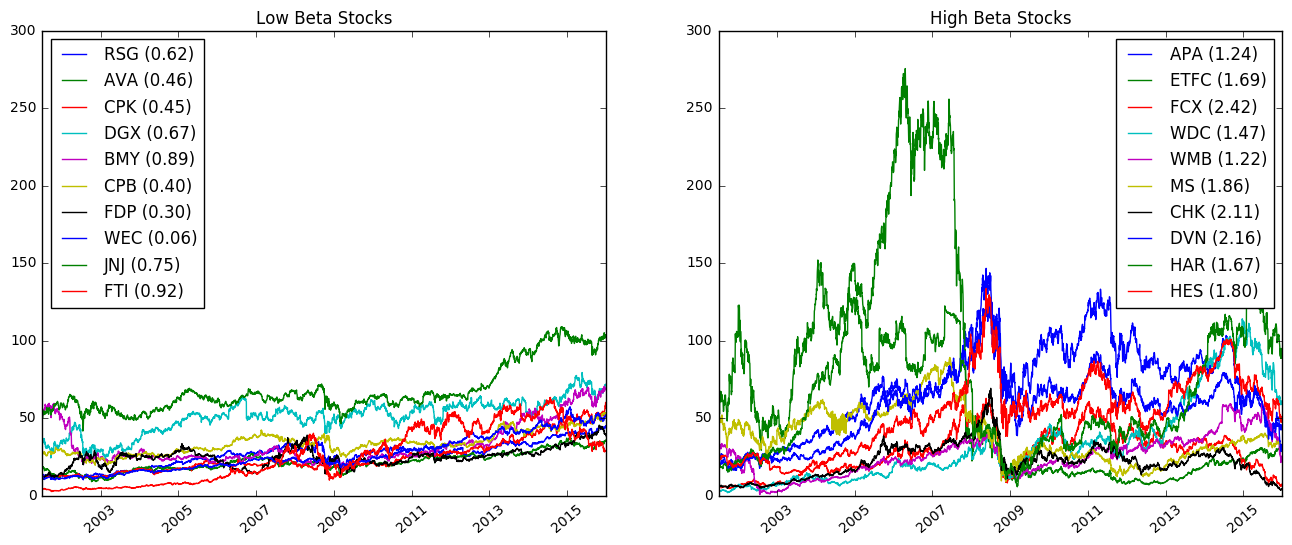

In [16]:
f = plt.figure(figsize=(16, 6))

#
#lo-beta stocks
#
ax1 = plt.subplot(1, 2, 1)
for s in low_beta: 
    c = trd.read_stock_history(join(trd.LO_BETA_DIR, s + '.csv'))
    
    #ax1.plot_date(c.index, c, label='{:s}'.format(s), ls='solid', marker='')
    ax1.plot_date(c.index, c, label='{:s} ({:.2f})'.format(s, betas[s]), ls='solid', marker='')

plt.xticks(rotation=40)
ax1.set_title('Low Beta Stocks')
ax1.legend(loc='upper left')

#
# hi-beta stocks
#
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
for s in high_beta: 
    c = trd.read_stock_history(join(trd.HI_BETA_DIR, s + '.csv'))
    
    #ax2.plot_date(c.index, c, label='{:s}'.format(s), ls='solid', marker='')
    ax2.plot_date(c.index, c, label='{:s} ({:.2f})'.format(s, betas[s]), ls='solid', marker='')

plt.xticks(rotation=40)
ax2.set_title('High Beta Stocks')
ax2.legend(loc='upper right')

In [17]:
f.savefig('stk_hist.png',  transparent=False)